<a href="https://colab.research.google.com/github/ziedjouini/Data_Projects/blob/main/zied_california_housing_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing librairies


In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.metrics import accuracy_score, r2_score

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

In [55]:
house_price_dataset = sklearn.datasets.load_boston()

ImportError: ignored

In [56]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]


In [57]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [58]:
from sklearn.datasets import fetch_openml
housing1 = fetch_openml(name="house_prices", as_frame=True)
housing1

{'data':         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
 0        1          60       RL         65.0     8450   Pave  None      Reg   
 1        2          20       RL         80.0     9600   Pave  None      Reg   
 2        3          60       RL         68.0    11250   Pave  None      IR1   
 3        4          70       RL         60.0     9550   Pave  None      IR1   
 4        5          60       RL         84.0    14260   Pave  None      IR1   
 ...    ...         ...      ...          ...      ...    ...   ...      ...   
 1455  1456          60       RL         62.0     7917   Pave  None      Reg   
 1456  1457          20       RL         85.0    13175   Pave  None      Reg   
 1457  1458          70       RL         66.0     9042   Pave  None      Reg   
 1458  1459          20       RL         68.0     9717   Pave  None      Reg   
 1459  1460          20       RL         75.0     9937   Pave  None      Reg   
 
      LandContour Utilities  .

MedInc (Revenu médian)
HouseAge (Âge moyen des maisons)
AveRooms (Nombre moyen de pièces par logement)
AveBedrms (Nombre moyen de chambres à coucher par logement)
Population (Population)
AveOccup (Nombre moyen d'occupants par logement)
Latitude (Latitude)
Longitude (Longitude)
le target c'est  "MedHouseVal" (Médiane de la valeur des maisons).

In [59]:
# Loading the dataset to a Pandas DataFrame
housing_df = pd.DataFrame(housing.data, columns = housing.feature_names)
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [60]:
# ajouter un colonne le  target (MedHouseVal::(Médiane de la valeur des maisons)) dand le DataFrame
housing_df['MedHouseVal'] = housing.target

In [61]:
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [62]:
housing_df.shape

(20640, 9)

In [63]:
housing_df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [64]:
# statistical measures of the dataset
housing_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


<Axes: xlabel='Longitude', ylabel='Latitude'>

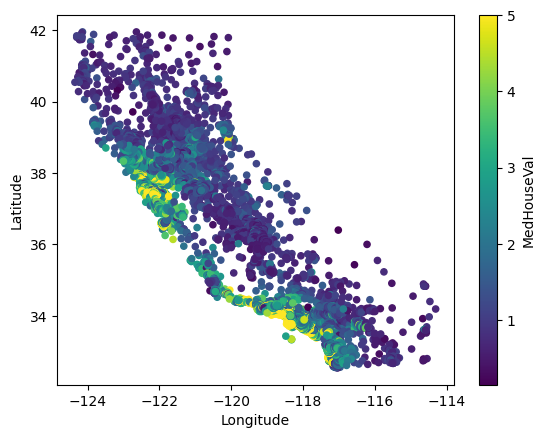

In [65]:
housing_df.plot(kind='scatter',x='Longitude',y='Latitude',c='MedHouseVal')

In [ ]:
"""import folium
m = folium.Map(location = [housing_df['Latitude'].mean(),housing_df['Longitude'].mean()], zoom_start= 5)

for index, row in housing_df.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']]).add_to(m)
m"""

In [66]:
correlation = housing_df.corr()

<Axes: >

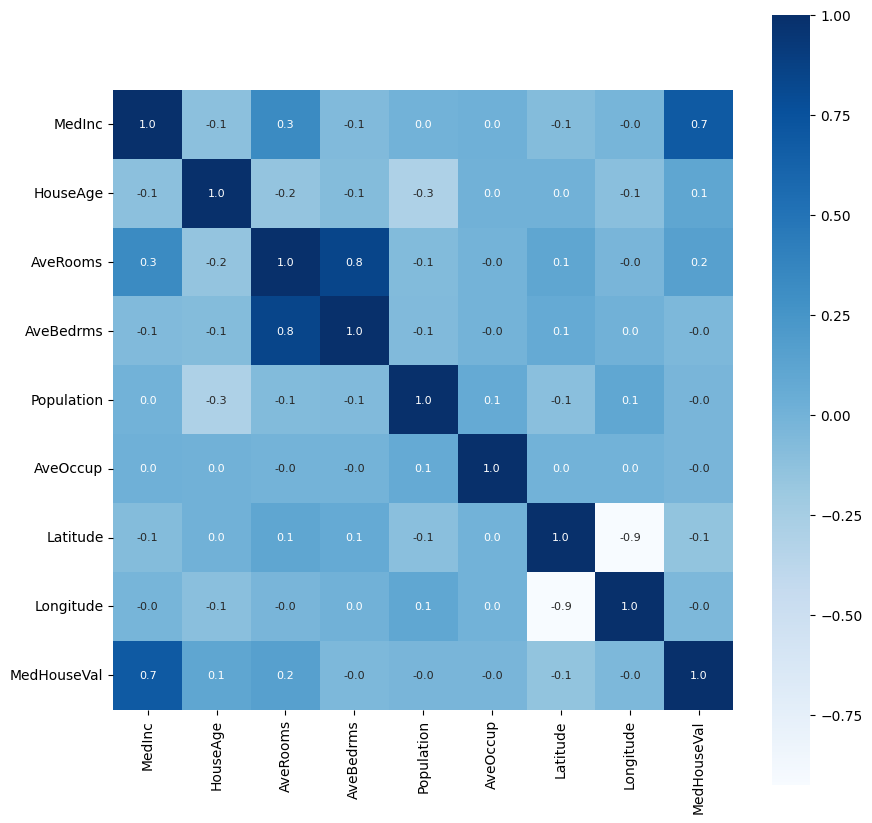

In [67]:
# constructing a heatmap to nderstand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [68]:
X = housing_df.drop(['MedHouseVal'], axis=1)
y = housing_df['MedHouseVal']

In [69]:
# Division des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
print(X.shape, X_train.shape, X_test.shape)

(20640, 8) (16512, 8) (4128, 8)


In [71]:
# Création et entraînement des modèles
model1 = LinearRegression()
model2 = RandomForestRegressor()
model3 = GradientBoostingRegressor()
model4 = XGBRegressor()

model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)
model4.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
pred1 = model1.predict(X_test)
pred2 = model2.predict(X_test)
pred3 = model3.predict(X_test)
pred4 = model4.predict(X_test)

# Calcul du R^2 pour des modèles individuels
r2_1 = r2_score(y_test, pred1)
r2_2 = r2_score(y_test, pred2)
r2_3 = r2_score(y_test, pred3)
r2_4 = r2_score(y_test, pred4)

# Combinaison des prédictions (par exemple, moyenne des prédictions)
#ensemble_pred = np.mean([pred1, pred2, pred3], axis=0)

# Évaluation des modèles individuels
mse1 = mean_squared_error(y_test, pred1)
mse2 = mean_squared_error(y_test, pred2)
mse3 = mean_squared_error(y_test, pred3)
mse4 = mean_squared_error(y_test, pred4)



# Évaluation du modèle ensemble
#ensemble_mse = mean_squared_error(y_test, ensemble_pred)

print(f"Mean Squared Error - Model 1: {mse1}")
print(f"Mean Squared Error - Model 2: {mse2}")
print(f"Mean Squared Error - Model 3: {mse3}")
print(f"Mean Squared Error - Model 4: {mse4}")
#print(f"Mean Squared Error - Ensemble Model: {ensemble_mse}")
print('')
print(f"R^2 - LinearRegression: {r2_1}")
print(f"R^2 - Random Forest Regressor: {r2_2}")
print(f"R^2 - GradientBoostingRegressor: {r2_3}")
print(f"R^2 - XGBRegressor: {r2_4}")

Mean Squared Error - Model 1: 0.5558915986952444
Mean Squared Error - Model 2: 0.2557951483134063
Mean Squared Error - Model 3: 0.29393470011606526
Mean Squared Error - Model 4: 0.2225899267544737

R^2 - LinearRegression: 0.5757877060324508
R^2 - Random Forest Regressor: 0.804797469674859
R^2 - GradientBoostingRegressor: 0.7756923945143868
R^2 - XGBRegressor: 0.8301370561019205


le meilleur modèl c'est XGBRegressor pour predire  (Médiane de la valeur des maisons)

2 methode avec une fonction

In [72]:
def train_and_evaluate_models(X, y):
    # Division des données
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialisation des modèles
    models = {
        'LinearRegression':LinearRegression(),
        'Random Forest': RandomForestRegressor(),
        'Gradient Boosting': GradientBoostingRegressor(),
        'XGBoost': XGBRegressor()
    }

    results = {}

    for model_name, model in models.items():
        # Entraînement du modèle
        model.fit(X_train, y_train)

        # Prédiction sur l'ensemble de test
        predictions = model.predict(X_test)

        # Calcul du R^2
        r2 = r2_score(y_test, predictions)

        # Calcul de l'erreur quadratique moyenne (MSE)
        mse = mean_squared_error(y_test, predictions)

        # Stockage des résultats
        results[model_name] = {'R2': r2, 'MSE': mse}

    return results

# Utilisation de la fonction
results = train_and_evaluate_models(X, y)

# Affichage des résultats
for model_name, metrics in results.items():
    print(f"{model_name} - R^2: {metrics['R2']}, MSE: {metrics['MSE']}")

LinearRegression - R^2: 0.5757877060324508, MSE: 0.5558915986952444
Random Forest - R^2: 0.807334575040017, MSE: 0.25247050266416
Gradient Boosting - R^2: 0.7756923945143868, MSE: 0.29393470011606526
XGBoost - R^2: 0.8301370561019205, MSE: 0.2225899267544737


In [73]:
# Ajout des prédictions comme nouvelle colonne dans le DataFrame
housing_df['Prediction'] = model4.predict(X)

In [76]:
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,Prediction
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,4.039974
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,3.728002
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,3.805853
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,3.082713
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,2.776693
...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781,0.802293
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771,0.792438
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923,0.913356
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847,0.741393


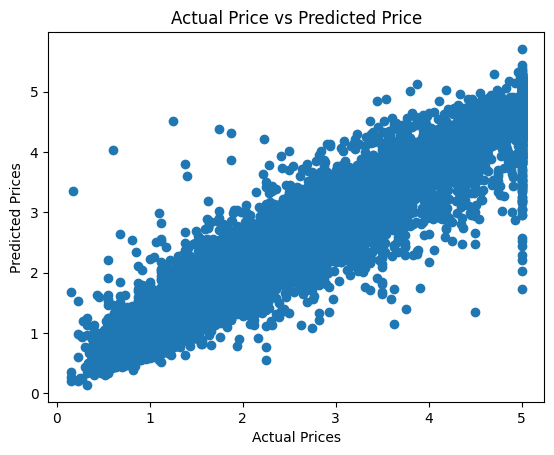

In [75]:
plt.scatter(housing_df['MedHouseVal'], housing_df['Prediction'])
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

je veux aouter un autre methode avec normalisation des données

In [77]:
from sklearn.preprocessing import MinMaxScaler

In [78]:
# Initialiser le scaler
scaler = MinMaxScaler()

# Appliquer la normalisation
X_normalized = scaler.fit_transform(X)

# Remplacer les colonnes d'origine par les colonnes normalisées
X_normalized_df = pd.DataFrame(X_normalized, columns=X.columns)

In [79]:
X_normalized_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,0.539668,0.784314,0.043512,0.020469,0.008941,0.001499,0.567481,0.211155
1,0.538027,0.392157,0.038224,0.018929,0.067210,0.001141,0.565356,0.212151
2,0.466028,1.000000,0.052756,0.021940,0.013818,0.001698,0.564293,0.210159
3,0.354699,1.000000,0.035241,0.021929,0.015555,0.001493,0.564293,0.209163
4,0.230776,1.000000,0.038534,0.022166,0.015752,0.001198,0.564293,0.209163


In [80]:
# Normalisation de l'ensemble d'entraînement
X_train_normalized = scaler.fit_transform(X_train)

# Normalisation de l'ensemble de test en utilisant les paramètres de normalisation de l'ensemble d'entraînement
X_test_normalized = scaler.transform(X_test)

In [81]:
# Création et entraînement des modèles
model1 = LinearRegression()
model2 = RandomForestRegressor()
model3 = GradientBoostingRegressor()
model4 = XGBRegressor()

model1.fit(X_train_normalized, y_train)
model2.fit(X_train_normalized, y_train)
model3.fit(X_train_normalized, y_train)
model4.fit(X_train_normalized, y_train)

# Prédiction sur l'ensemble de test
pred11 = model1.predict(X_test_normalized)
pred22 = model2.predict(X_test_normalized)
pred33 = model3.predict(X_test_normalized)
pred44 = model4.predict(X_test_normalized)

# Calcul du R^2 pour des modèles individuels
r2_1 = r2_score(y_test, pred11)
r2_2 = r2_score(y_test, pred22)
r2_3 = r2_score(y_test, pred33)
r2_4 = r2_score(y_test, pred44)

# Combinaison des prédictions (par exemple, moyenne des prédictions)
#ensemble_pred = np.mean([pred1, pred2, pred3], axis=0)

# Évaluation des modèles individuels
mse1 = mean_squared_error(y_test, pred11)
mse2 = mean_squared_error(y_test, pred22)
mse3 = mean_squared_error(y_test, pred33)
mse4 = mean_squared_error(y_test, pred44)



# Évaluation du modèle ensemble
#ensemble_mse = mean_squared_error(y_test, ensemble_pred)

print(f"Mean Squared Error - Model 1: {mse1}")
print(f"Mean Squared Error - Model 2: {mse2}")
print(f"Mean Squared Error - Model 3: {mse3}")
print(f"Mean Squared Error - Model 4: {mse4}")
#print(f"Mean Squared Error - Ensemble Model: {ensemble_mse}")
print('')
print(f"R^2 - LinearRegression: {r2_1}")
print(f"R^2 - Random Forest Regressor: {r2_2}")
print(f"R^2 - GradientBoostingRegressor: {r2_3}")
print(f"R^2 - XGBRegressor: {r2_4}")

Mean Squared Error - Model 1: 0.5558915986952438
Mean Squared Error - Model 2: 0.2559759530168092
Mean Squared Error - Model 3: 0.29453835407523027
Mean Squared Error - Model 4: 0.2225899267544737

R^2 - LinearRegression: 0.5757877060324512
R^2 - Random Forest Regressor: 0.8046594938929427
R^2 - GradientBoostingRegressor: 0.7752317337823644
R^2 - XGBRegressor: 0.8301370561019205
